# 1. Load runtime table

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

index_info_df = pd.read_csv('cases/full/index-info.tsv', sep='\t')
index_info_df.loc[index_info_df['Name'] == '0810PADBR-1', 'Organism'] = 'Campylobacter jejuni'
index_info_df.loc[index_info_df['Name'] == '1405WAEXK-1', 'Organism'] = 'Escherichia coli'
index_info_df.loc[index_info_df['Name'] == '1408MLGX6-3WGS', 'Organism'] = 'Listeria monocytogenes'
index_info_df.loc[index_info_df['Name'] == '1203NYJAP-1 - Tuna Scrape Outbreak', 'Organism'] = 'Salmonella enterica'

execution_order = ['Campylobacter jejuni', 'Escherichia coli',
                  'Listeria monocytogenes', 'Salmonella enterica']

# Calculated from an empty index "gdi init" and
# "gdi db size --unit B"
empty_index_size_bytes = 208896

for idx, organism in enumerate(execution_order):
    for iteration in [1, 2, 3]:
        index_size_iteration_value = index_info_df.loc[(index_info_df['Organism'] == organism) & \
                  (index_info_df['Iteration'] == iteration), 'Index size'].tolist()[0]
            
        if idx == 0:
            index_info_df.loc[(index_info_df['Organism'] == organism) & \
                              (index_info_df['Iteration'] == iteration),
                              'Index size (organism)'] = index_size_iteration_value - 208896
        else:
            organism_prev = execution_order[idx - 1]
            index_size_iteration_value_prev = index_info_df.loc[(index_info_df['Organism'] == organism_prev) & \
                      (index_info_df['Iteration'] == iteration), 'Index size'].tolist()[0]
            
            index_info_df.loc[(index_info_df['Organism'] == organism) & \
                              (index_info_df['Iteration'] == iteration),
                              'Index size (organism)'] = index_size_iteration_value - index_size_iteration_value_prev
index_info_df

,Name,Reference name,Iteration,Number samples,Number features (all),Number features (no unknown),Number cores,Reference length,Analysis runtime,Analysis memory (max),...,Index memory (max),Index memory (max/process),Index size,Tree runtime,Tree memory (max),Tree memory (max/process),Total runtime,Max memory,Organism,Index size (organism)
0,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,1,22,45117,1102,4,1634890,3166.13,1.558306e+10,...,2.115244e+09,7.189709e+08,46587904.0,24.67,5.446205e+08,276631552.0,3245.00,1.558306e+10,Campylobacter jejuni,46379008.0
1,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,1,9,550816,601,4,5412686,988.93,5.550060e+09,...,3.802116e+09,3.802116e+09,134742016.0,31.23,8.184218e+08,459071488.0,1236.72,5.550060e+09,Escherichia coli,88154112.0
2,1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,1,31,142442,170,4,2939733,2388.76,1.005870e+10,...,2.534011e+09,9.588531e+08,174067712.0,34.07,9.945620e+08,660180992.0,2546.08,1.005870e+10,Listeria monocytogenes,39325696.0
3,1203NYJAP-1 - Tuna Scrape Outbreak,GCF_000439415.1_ASM43941v1_genomic,1,23,418622,165,4,4808805,1517.54,6.843236e+09,...,5.624377e+09,2.788295e+09,251715584.0,38.29,1.335677e+09,870260736.0,1856.47,6.843236e+09,Salmonella enterica,77647872.0
4,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,2,22,45117,1102,4,1634890,3158.43,1.560137e+10,...,2.290647e+09,7.244390e+08,46682112.0,21.59,5.444198e+08,276242432.0,3236.90,1.560137e+10,Campylobacter jejuni,46473216.0
5,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,2,9,550816,601,4,5412686,991.97,5.480444e+09,...,3.771884e+09,3.771884e+09,134828032.0,30.81,8.194007e+08,459337728.0,1240.15,5.480444e+09,Escherichia coli,88145920.0
6,1408MLGX6-3WGS,GCF_001047715.2_ASM104771v2_genomic,2,31,142442,170,4,2939733,2388.61,9.555489e+09,...,3.185816e+09,1.059996e+09,173850624.0,36.21,9.951846e+08,660570112.0,2542.55,9.555489e+09,Listeria monocytogenes,39022592.0
7,1203NYJAP-1 - Tuna Scrape Outbreak,GCF_000439415.1_ASM43941v1_genomic,2,23,418622,165,4,4808805,2102.23,6.751625e+09,...,6.020960e+09,2.700640e+09,252108800.0,37.54,1.335370e+09,870191104.0,2447.55,6.751625e+09,Salmonella enterica,78258176.0
8,0810PADBR-1,GCA_001879185.2_ASM187918v2_genomic,3,22,45117,1102,4,1634890,3164.05,1.538114e+10,...,2.191090e+09,7.395000e+08,46538752.0,22.05,5.440676e+08,276090880.0,3243.35,1.538114e+10,Campylobacter jejuni,46329856.0
9,1405WAEXK-1,GCF_000703365.1_Ec2011C-3609_genomic,3,9,550816,601,4,5412686,986.85,5.426352e+09,...,3.808711e+09,3.808711e+09,134664192.0,29.04,8.182333e+08,459100160.0,1245.16,5.426352e+09,Escherichia coli,88125440.0


In [2]:
index_info_df.set_index(['Organism', 'Iteration'])[['Index size', 'Index size (organism)']]

,,Index size,Index size (organism)
Organism,Iteration,,
Campylobacter jejuni,1,46587904.0,46379008.0
Escherichia coli,1,134742016.0,88154112.0
Listeria monocytogenes,1,174067712.0,39325696.0
Salmonella enterica,1,251715584.0,77647872.0
Campylobacter jejuni,2,46682112.0,46473216.0
Escherichia coli,2,134828032.0,88145920.0
Listeria monocytogenes,2,173850624.0,39022592.0
Salmonella enterica,2,252108800.0,78258176.0
Campylobacter jejuni,3,46538752.0,46329856.0


# 2. Plots

## 2.1. Runtime

### 2.1.1. Common styles 

In [3]:
stages_palette = ['#1b9e77', '#7570b3', '#d95f02', '#000000']
stages_markers = ['o', 's', '^', 'X']
stages_palette_nototal = ['#1b9e77', '#7570b3', '#d95f02']
stages_markers_nototal = ['o', 's', '^']
stages_palette_notree = ['#1b9e77', '#7570b3', '#000000']
stages_markers_notree = ['o', 's', 'X']

### 2.1.2. Runtime plots

In [6]:
def melt_runtimes(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df.copy()
    df = df[~df['Tree runtime'].isna()]
    value_vars = ['Analysis runtime', 'Index runtime', 'Tree runtime', 'Total runtime']
    df = pd.melt(df, id_vars=id_vars,
            value_vars=value_vars)
    df = df.rename({'variable': 'Stage', 'value': 'Time (seconds)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' runtime', '', regex=False)
    df['Time (minutes)'] = df['Time (seconds)'] / 60
    df['Time (hours)'] = df['Time (seconds)'] / 3600
    
    df['Time/sample (seconds)'] = df['Time (seconds)'] / df['Number samples']
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
    
    df['Label'] = df['Organism'] + "\n(" + df['Number samples'].astype('str') + " samples, " + \
                 df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
        
    return df

index_info_runtime_df = melt_runtimes(index_info_df, id_vars=['Name', 'Organism',
                                                              'Number samples', 'Reference length',
                                                              'Number features (all)',
                                                              'Number features (no unknown)'])
index_info_runtime_df

,Name,Organism,Number samples,Reference length,Number features (all),Number features (no unknown),Stage,Time (seconds),Time (minutes),Time (hours),Time/sample (seconds),Reference length (Mbp),Label
0,0810PADBR-1,Campylobacter jejuni,22,1634890,45117,1102,Analysis,3166.13,52.768833,0.879481,143.915000,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
1,1405WAEXK-1,Escherichia coli,9,5412686,550816,601,Analysis,988.93,16.482167,0.274703,109.881111,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
2,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,142442,170,Analysis,2388.76,39.812667,0.663544,77.056774,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
3,1203NYJAP-1 - Tuna Scrape Outbreak,Salmonella enterica,23,4808805,418622,165,Analysis,1517.54,25.292333,0.421539,65.980000,4.808805,"Salmonella enterica\n(23 samples, 4.8 mbp)"
4,0810PADBR-1,Campylobacter jejuni,22,1634890,45117,1102,Analysis,3158.43,52.640500,0.877342,143.565000,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
5,1405WAEXK-1,Escherichia coli,9,5412686,550816,601,Analysis,991.97,16.532833,0.275547,110.218889,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"
6,1408MLGX6-3WGS,Listeria monocytogenes,31,2939733,142442,170,Analysis,2388.61,39.810167,0.663503,77.051935,2.939733,"Listeria monocytogenes\n(31 samples, 2.9 mbp)"
7,1203NYJAP-1 - Tuna Scrape Outbreak,Salmonella enterica,23,4808805,418622,165,Analysis,2102.23,35.037167,0.583953,91.401304,4.808805,"Salmonella enterica\n(23 samples, 4.8 mbp)"
8,0810PADBR-1,Campylobacter jejuni,22,1634890,45117,1102,Analysis,3164.05,52.734167,0.878903,143.820455,1.634890,"Campylobacter jejuni\n(22 samples, 1.6 mbp)"
9,1405WAEXK-1,Escherichia coli,9,5412686,550816,601,Analysis,986.85,16.447500,0.274125,109.650000,5.412686,"Escherichia coli\n(9 samples, 5.4 mbp)"


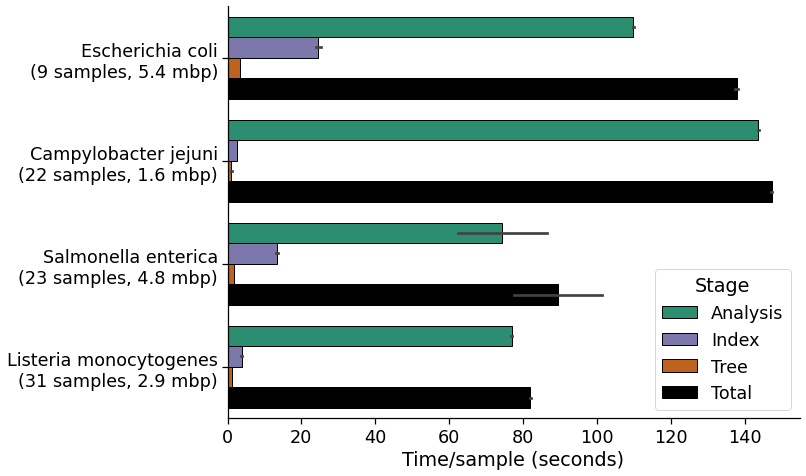

In [10]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_runtime_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.catplot(y='Label', x='Time/sample (seconds)', hue="Stage", ci="sd", kind="bar",
                    data=index_info_runtime_df, edgecolor='black',
                    height=7, aspect=1.7, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette)
    g.set(ylabel=None)

    plt.savefig('figures/index-runtime.pdf')

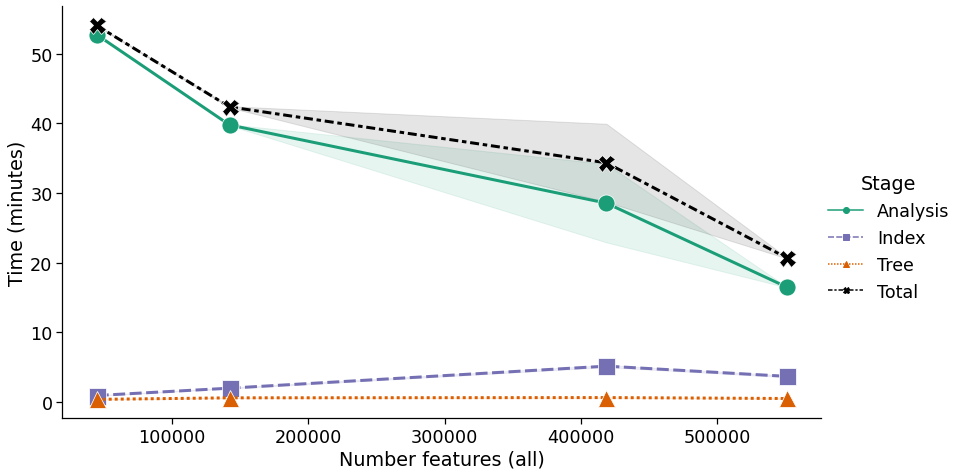

In [23]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_runtime_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.relplot(x='Number features (all)', y='Time (minutes)',
                    hue="Stage", style="Stage", ci="sd", estimator="mean", kind="line",
                    data=index_info_runtime_df,
                    height=7, aspect=1.7,
                    linewidth=3, markersize=17, err_kws={"alpha": 0.1},
                    palette=stages_palette,
                    markers=stages_markers)

    # plt.savefig('figures/index-runtime.pdf')

#### 2.1.2.1. Mean/stdevs

In [ ]:
index_info_runtime_df[['Label', 'Stage', 'Time/sample (seconds)']]\
 .groupby(['Label', 'Stage']).agg(['mean', 'std', 'count'])

## 2.2. Memory plots

In [ ]:
def melt_memory(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df[~df['Tree memory (max)'].isna()]
    value_vars = ['Analysis memory (max)', 'Index memory (max)', 'Tree memory (max)']

    df = pd.melt(df, id_vars=id_vars,
            value_vars=value_vars)
    df['value'] = df['value'].apply(lambda x: x/(1024**3))
    df = df.rename({'variable': 'Stage', 'value': 'Peak Memory (GB)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' memory (max)', '', regex=False)
    
    df['Peak Memory/sample (GB)'] = df['Peak Memory (GB)'] / df['Number samples']
    
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
        
    df['Label'] = df['Organism'] + "\n(" + df['Number samples'].astype('str') + " samples, " + \
             df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
    
    return df

index_info_memory_df = melt_memory(index_info_df, id_vars=['Name', 'Organism',
                                                            'Number samples', 'Reference length'])
index_info_memory_df

In [ ]:
with sns.plotting_context("notebook", font_scale=1.6):
    cat_order = index_info_memory_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.catplot(y='Label', x='Peak Memory (GB)', hue="Stage", ci="sd", kind="bar",
                    data=index_info_memory_df, edgecolor='black',
                    height=7, aspect=1.7, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette)
    g.set(ylabel=None)

    plt.savefig('figures/index-memory.pdf')

### 2.2.1. Mean/stddev

In [ ]:
index_info_memory_df[['Label', 'Stage', 'Peak Memory (GB)']]\
 .groupby(['Label', 'Stage']).agg(['mean', 'std', 'count'])

## 2.3. Disk usage plots

In [ ]:
def melt_disk_usage(df: pd.DataFrame, id_vars: str) -> pd.DataFrame:
    df = df.copy()
    df['Index size'] = df['Index size (organism)']
    
    df['Total size'] = df['Analysis disk uage'] + df['Index size']
    df = pd.melt(df, id_vars=id_vars,
            value_vars=['Analysis disk uage', 'Index size'])
    df['value'] = df['value'].apply(lambda x: x/(1024**2))
    df = df.rename({'variable': 'Stage', 'value': 'Disk (MB)'}, axis='columns')
    df['Stage'] = df['Stage'].str.replace(' disk uage', '', regex=False)
    df['Stage'] = df['Stage'].str.replace(' size', '', regex=False)
    
    df['Disk/sample (MB)'] = df['Disk (MB)'] / df['Number samples']
    df['Reference length (Mbp)'] = df['Reference length'] / 10**6
        
    df['Label'] = df['Organism'] + "\n(" + df['Number samples'].astype('str') + " samples, " + \
                 df['Reference length (Mbp)'].apply(lambda x: f'{x:0.1f}') + ' mbp)'
    
    return df
index_info_disk_df = melt_disk_usage(index_info_df, id_vars=['Name', 'Organism',
                                                              'Number samples', 'Reference length'])
index_info_disk_df

In [ ]:
with sns.plotting_context("notebook", font_scale=1.8):
    cat_order = index_info_disk_df.groupby('Label').agg('first').sort_values('Number samples').index.tolist()
    
    g = sns.catplot(y='Label', x='Disk/sample (MB)', col="Stage", hue="Stage", ci="sd", kind="bar",
                    data=index_info_disk_df, edgecolor='black',
                    height=7, aspect=1.4, linewidth=1,
                    legend_out=False,
                    order=cat_order,
                    palette=stages_palette,
                    sharex=False)
    g.set(ylabel=None)

    plt.savefig('figures/index-disk.pdf')

### 2.3.1. Mean/stddev

In [ ]:
index_info_disk_df[['Label', 'Stage', 'Disk/sample (MB)']]\
 .groupby(['Label', 'Stage']).agg(['mean', 'std', 'count'])